# Statistical Distributions

![](images/distributions.png)

# Order of Business:
    
>    1. Describe the difference between discrete vs continuous variables
>    2. Describe the difference between PMFs, PDFs, CDFs
>    3. Introduce the bernouli and binomial distributions
>    4. Introduce the normal distribution and empirical rule

## What is a statistical distribution?

- A statistical distribution is a representation of the frequencies of potential events or the percentage of time each event occurs.



# 1. Discrete vs Continuous


What is the difference between a continuous and a discrete distribution?

## Discrete
>  With discrete distributions, the values can only take a finite set of values.  Take, for example, a roll of a single die. 

![](images/uniform.png)

> - There are 6 possible outcomes of the roll.  In other words, 4.5 cannot be an outcome. As you see on the PMF plot, the bars which represent probability do not touch, suggesting non-integer numbers between 1 and 6 are not possible results.

#### Examples of discrete distributions:

> 1. The Bernoulli Distribution: - represents the probability of success for a certain experiment (binary outcome).
> 2. The Poisson Distribution:- represents the probability of 𝑛 events in a given time period when the overall rate of occurrence is constant.
> 3. The Uniform Distribution:- occurs when all possible outcomes are equally likely.

## Continuous

With a continous distribution, the set of possible results is an infinite set of values within a range.

> - A common example is height.  Although we think of height often in values such as 5 feet 7 inches, the exact height of a person can be any value within the range of possible heights.  In other words, a person could be 5 foot 7.000001 inches tall. 
> - Another example is temperature, as shown below:

![](images/pdf.png)

#### Examples of continuous distributions
> 1. The Normal or Gaussian distribution.
> 2. Exponential
> 3. Continuous uniform

Put the following into bins: discrete or continuous
> age, height, arrival time, age in years, weight, downloads, streams, how many eggs a chicken lays, temperature, stock closing price

# 2. PMFs, PDFs, and CDFs, oh my!

## PMF: Probability Mass Function

A probability mass functions is a plot of the probabilities of all the discrete possible outcomes.


![](images/pmf.png)

#### To convert any random variable's frequency into a probability, we need to perform the following steps:

> 1.  Get the frequency of every possible value in the dataset
> 2. Divide the frequency of each value by the total number of values (length of dataset) 
> 3. Get the probability for each value

### Expected value and variance for PMFs

> 1. **Expected value**: "The expected value of a discrete random variable is the probability-weighted average of all its possible values."$^1$[](https://en.wikipedia.org/wiki/Expected_value) 
> 2. **Variance**: "The expectation of the squared deviation of a random variable from its mean." $^2$[](https://en.wikipedia.org/wiki/Variance)

![](images/pmf_formulas.png)

In [24]:
# expected value for a roll of a six-side die
expected_value = sum([1/6 * n for n in range(1,7)])
print(f'Expected value: {expected_value}')
# variance for a roll of a six-sided die
variance = sum([1/6 *(n - expected_value)**2 for n in range(1,7)])
print(f'Variance: {variance}')

Expected value: 3.5
Variance: 2.9166666666666665


In [10]:
import matplotlib.pyplot as plt
# Use a barplot to recreate the pmf of a single roll of a six-sided die.

result_set = []
roll_probabilities = []


<BarContainer object of 6 artists>

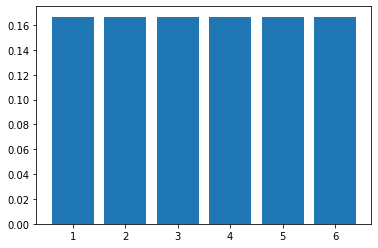

In [11]:
# your answer here
result_set = list(range(1,7))
roll_probabilities = [1/6 for result in result_set]

plt.bar(result_set, roll_probabilities)

## PDF: Probability Density Function
> Probability density functions are similar to PMFs, in that they describe the probability of a result within a range of values.  But where PMFs can be descibed with barplots, PDFs are smooth curves.  

![](images/pdf_temp.png)



### Expected value and variance for PDFs:
![](images/exp_v_pdf.png)


![](images/pdf_inter.png)

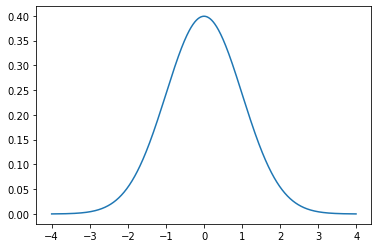

In [53]:
# We can create a normal distribution using scipy
import scipy
import numpy as np

number_range = np.arange(-4,4,.01)
number_prob = [scipy.stats.norm(0, 1).pdf(n) for n in number_range]

plt.plot(number_range, number_prob)
    

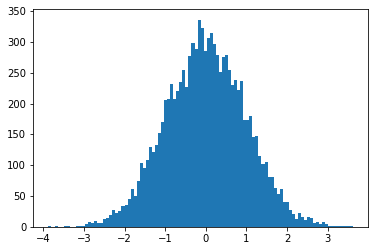

In [67]:
# We can also use a histogram to see that as we increase the number of bins, 
# the shape of the countour of the histogram becomes smoother.
plt.hist(np.random.normal(0,1,10000), bins=100, density=False);

## CDF: Cumulative Distribution Function

- For continuous random variables, obtaining probabilities for observing a specific outcome is not possible 
- Have to be careful with interpretation in PDF

The CDF plots the probability that a variable will be less than or equal to a given value.  A well known example is percentiles of standardized test scores.  A student receives her percentile score, which is the percentage of test takers who score below her in the exam. 

![](images/cdf.png)

Examples: 
> - What is the probability that you throw a value ≤ 4 when throwing a dice? 
> - What is the probability that the temperature in NYC is ≤ 79?

# 3. Bernouli and Binomial Distributions

In our work as data scientists, we will often come across scenarios which our results can be categorized as failure or success (0 or 1). The simplest example is, once again, a coin flip.  In this scenario, we define either heads or tails as a "success", and assume, if the coin is fair, the probability of success to be .5

![](images/bernouli.png)

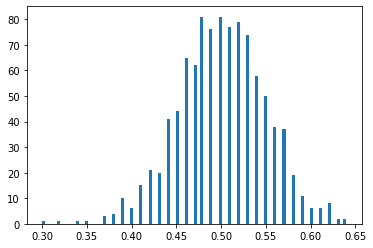

In [58]:
import numpy as np
import matplotlib.pyplot as plt
# A Bernouli trial for a fair coin can be performed with numpy's binomial

p = .5
np.random.binomial(1,.5, size=50)

binom_means = []
for _ in range(1000):
    binom_means.append(np.random.binomial(1,.5, size=100).mean())


plt.hist(binom_means, bins=100);
 


## Binomial

The Binomial distribution describes the number of successess of a set of bernouli trials. For example, if we flipped a coin 10 times, how many times would it land on heads.  We would expect to see the 5 heads.  

- If we repeat this process multiple times
- n independent Bernoulli trials

- Eg:
> - 𝑃(𝑌=0) (or the soccer player doesn't score a single time)? 
> - 𝑃(𝑌=1) (or the soccer player scores exactly once)? 
> - 𝑃(𝑌=2) (or the soccer player scores exactly twice)? 
> - 𝑃(𝑌=3) (or the soccer player scores exactly three times)?

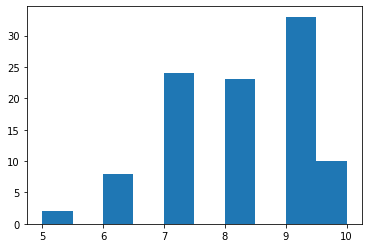

In [70]:
# Consider a soccer player has a 80% success rate in converting penalties.
# Use numpy's binomial function to plot a binomial distribution 
# of the number of goals scored over 10 tries across 100 trials.

results = np.random.binomial(10, .8, size=100)
plt.hist(results);

![](images/binomial.png)

- Expected Value
> $E(X) = np$ <br>
- Variance
> $Var(X) = np(1-p)$<br>

- If we want to see the probability of a certain number of successes, we use the pmf.
> $pmf = {n \choose k}*p^k*(1-p)^{n-k}$


# 4. Normal Distribution

The last distribution we will cover today is the normal distribution. You probably recognize its distinctive bell curve.  It is the most important distribution for our purposes in this course and will reappear often in machine learning.

![](images/normal.png)

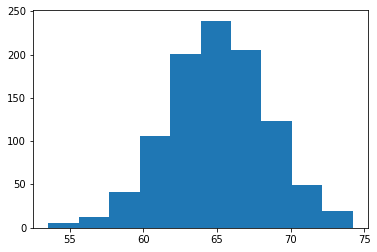

In [72]:
# suppose the average height of an American woman is 65 inches
# with a standard deviation of 3.5 inches. 
# Use numpy's random.normal to generate a sample of 1000 women
# and plot the histogram of the sample.


![](images/normal_2.png)

The standard normal distribution, or z curve, is centered around 0 with a standard deviation of 1.  

![](images/empirical_rule.png)

## Empirical Rule
> The empirical or 68–95–99.7 states that 68% of the values of a normal distribution of data lie within 1 standard deviation of the mean, 95% within 2 stds, and 99.7 within three.  
> The empirical rule has countless applications in data science, which we will expand upon in the next few lectures.